**Name:** Divyansh Srivastava <br>
**Roll no.:** 180100040

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [3]:
#reading and visualizing the datasets
red_wine_df = pd.read_csv('winequality-red.csv')
white_wine_df = pd.read_csv('winequality-white.csv')
print("For red wine:-")
display(red_wine_df)
print('\nFor white wine:-')
display(white_wine_df)

For red wine:-


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5



For white wine:-


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


**Observations:-**
  1. The scales of columns are different.
  2. More samples are available for white wine as compared to red wine.

In [4]:
#checking for the datatypes present in the dataset
print('For red wine:-\n',red_wine_df.dtypes)
print('\nFor white wine:-\n',white_wine_df.dtypes)

For red wine:-
 fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

For white wine:-
 fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


In [5]:
#checking for any null entries in the datasets
print('For red wine:-')
for col in red_wine_df.columns.values:
  uniq_val = pd.unique(red_wine_df[col])
  has_null = False
  if None in uniq_val:
    has_null = True
  if has_null:
    print(str(col)+' has null values.  (NOT CLEAN DATA)')
  else:
    print(str(col)+' doesn\'t have any null value. (CLEAN DATA)')

print('\nFor white wine:-')
for col in white_wine_df.columns.values:
  uniq_val = pd.unique(white_wine_df[col])
  has_null = False
  if None in uniq_val:
    has_null = True
  if has_null:
    print(str(col)+' has null values.  (NOT CLEAN DATA)')
  else:
    print(str(col)+' doesn\'t have any null value. (CLEAN DATA)')

For red wine:-
fixed acidity doesn't have any null value. (CLEAN DATA)
volatile acidity doesn't have any null value. (CLEAN DATA)
citric acid doesn't have any null value. (CLEAN DATA)
residual sugar doesn't have any null value. (CLEAN DATA)
chlorides doesn't have any null value. (CLEAN DATA)
free sulfur dioxide doesn't have any null value. (CLEAN DATA)
total sulfur dioxide doesn't have any null value. (CLEAN DATA)
density doesn't have any null value. (CLEAN DATA)
pH doesn't have any null value. (CLEAN DATA)
sulphates doesn't have any null value. (CLEAN DATA)
alcohol doesn't have any null value. (CLEAN DATA)
quality doesn't have any null value. (CLEAN DATA)

For white wine:-
fixed acidity doesn't have any null value. (CLEAN DATA)
volatile acidity doesn't have any null value. (CLEAN DATA)
citric acid doesn't have any null value. (CLEAN DATA)
residual sugar doesn't have any null value. (CLEAN DATA)
chlorides doesn't have any null value. (CLEAN DATA)
free sulfur dioxide doesn't have any nu

**Observations:**
  For both datasets, we don't have any null entry, so we can be sure that our dataset is fully populated and we can go ahead visualizing it.

For red wine:-


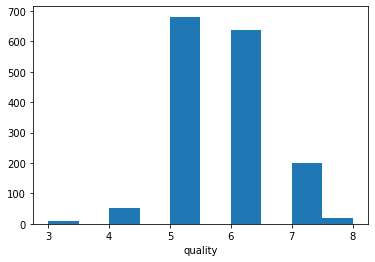


For white wine:-


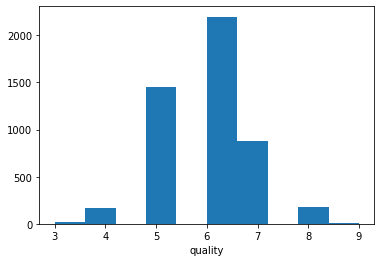

In [6]:
#plotting the histograms for distribution of quality of the datasets
print('For red wine:-')
col = 'quality'
plt.hist(red_wine_df[col])
plt.xlabel(col)
plt.show()

print('\nFor white wine:-')
plt.hist(white_wine_df[col])
plt.xlabel(col)
plt.show()

**Observations:**
1. As we can see from the histograms,
  *   Samples with quality 5 and 6 are dominant in red wine dataset.
  *   Samples with quality 6 are dominant in white wine dataset.



Correlation matrix for red wine:-


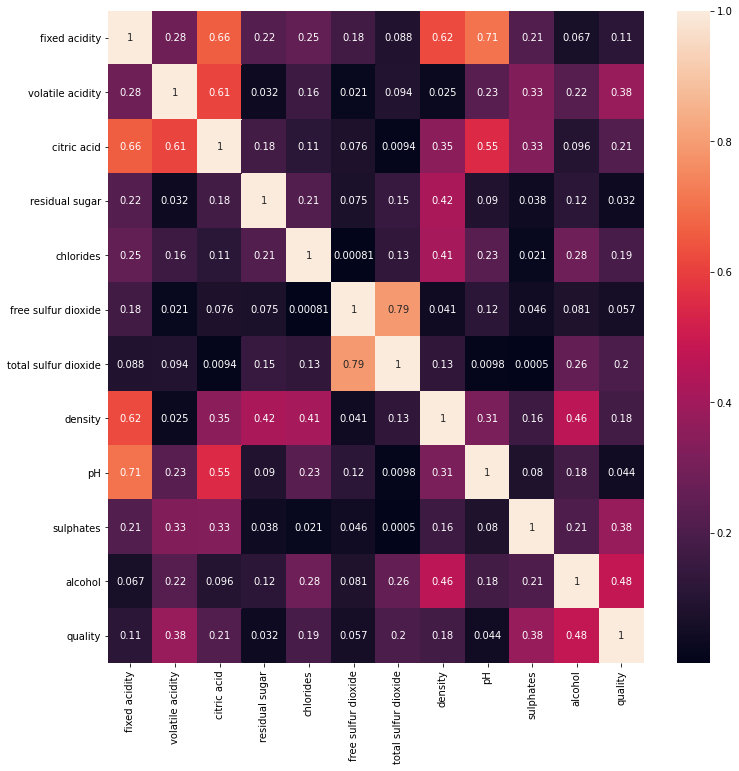


Correlation matrix for white wine:-


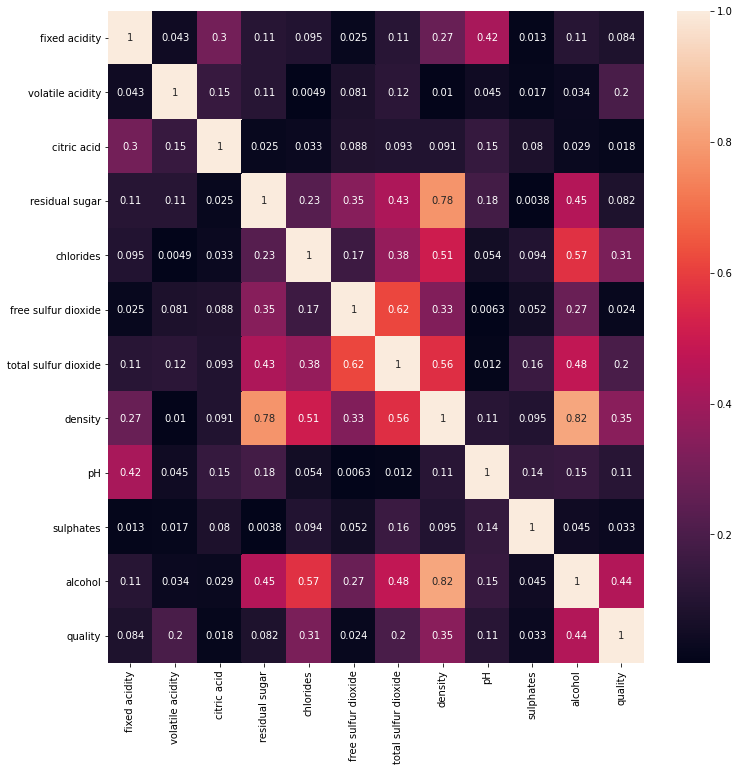

In [7]:
print('Correlation matrix for red wine:-')
corrMatrix = red_wine_df.corr(method='spearman')
fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(abs(corrMatrix), annot=True)
plt.show()

print('\nCorrelation matrix for white wine:-')
corrMatrix = white_wine_df.corr(method='spearman')
fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(abs(corrMatrix), annot=True)
plt.show()

**Observations:**
  We can see that there is some amount of correlation betwwen variables in both the datasets. For example, <br>


*   In red wine, fixed acidity and pH are highly correlated, we can drop pH for this dataset. Similarly, density and fixed acidity, citric acid and fixed acidity and volatile acidity.
*   In white wine, alcohol and density are highly correlated, similarly residual sugar and density, total sulfur dioxide and free sulphur dioxide.



For red wine:-



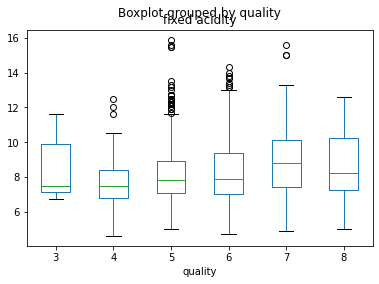

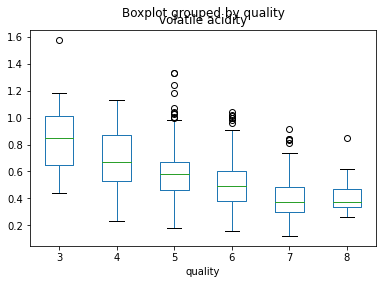

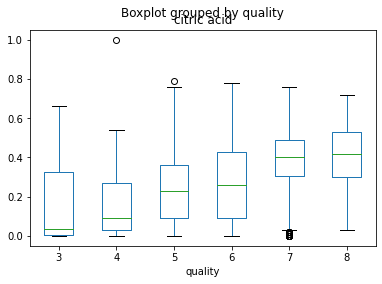

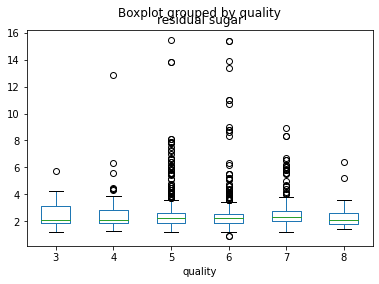

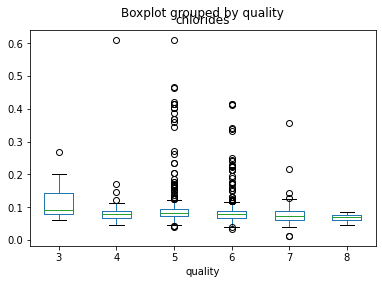

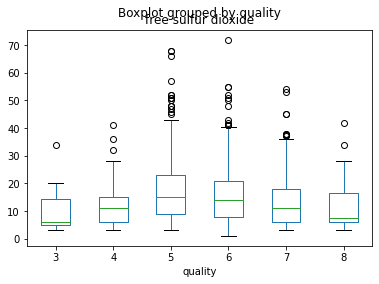

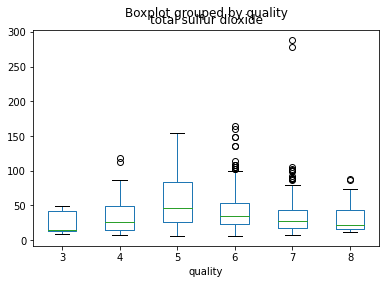

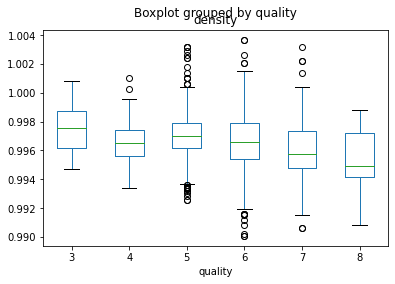

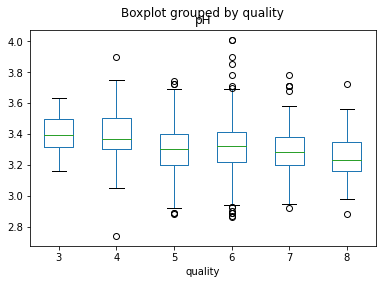

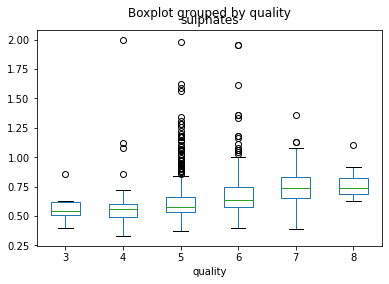

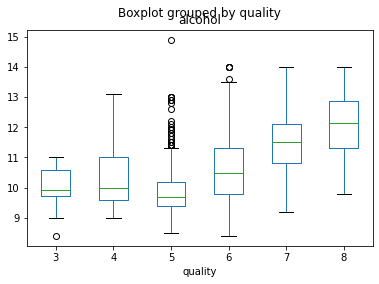

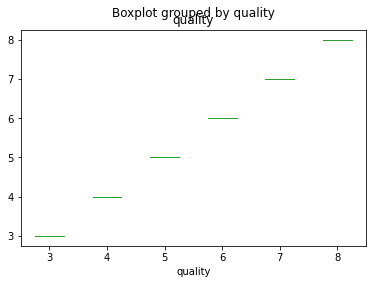

In [8]:
print('For red wine:-\n')
for col in red_wine_df.columns.values:
  # print(col, "hello", type(col))
  red_wine_df.boxplot(by='quality', column=col, grid=False)

For white wine:-



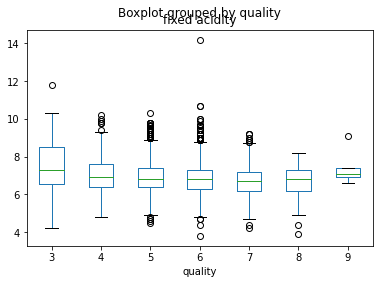

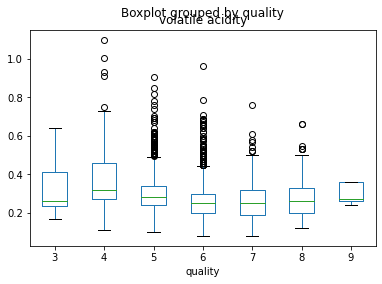

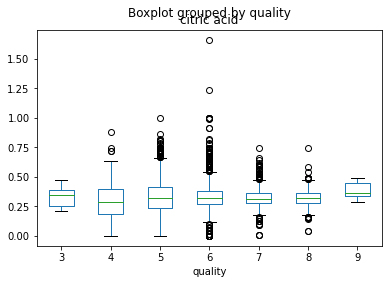

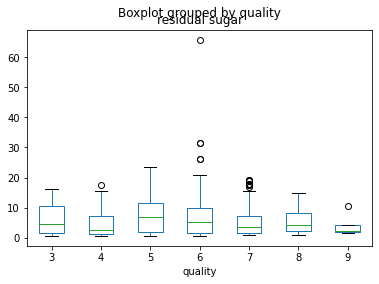

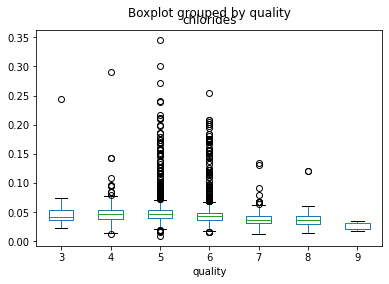

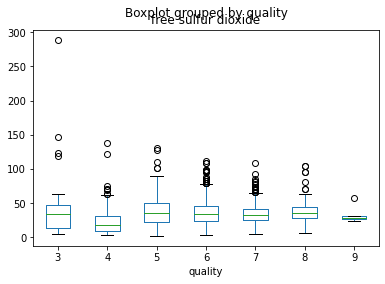

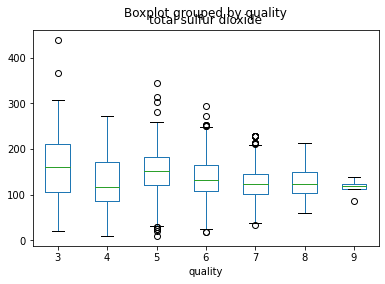

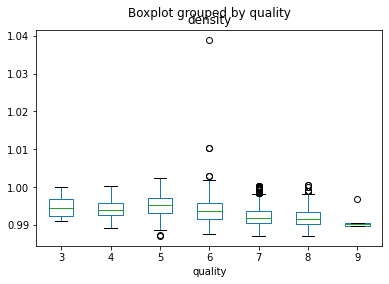

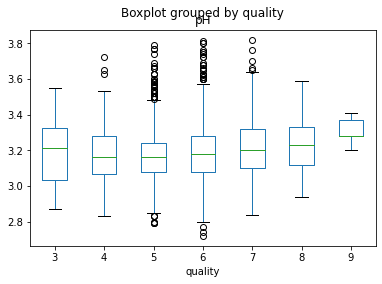

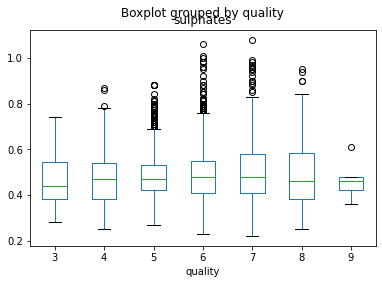

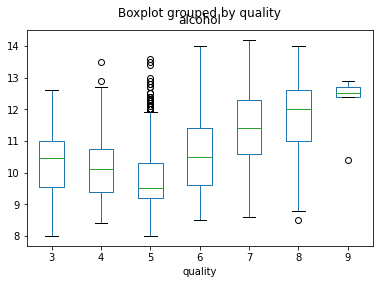

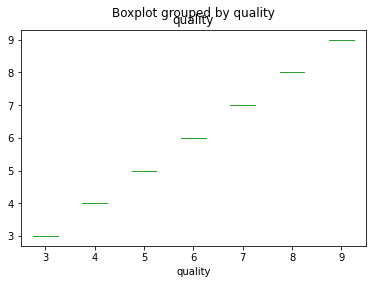

In [9]:
print('For white wine:-\n')
for col in white_wine_df.columns.values:
  # print(col, "hello", type(col))
  white_wine_df.boxplot(by='quality', column=col, grid=False)

So here, a couple of points: </br>


*   We will be dropping fixed acidity as it has less spread as compared to pH in red wine dataset, also we will drop free sulfur dioxide as it has high correlation with total sulfur dioxide and less spread as compared to total sulfur dioxide.
*   We will be dropping density as it has high correlation with both residual sugar and alcohol



,0,1,2,3,4,5,6,7,8
0,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,0.558274,1.288643,-0.579207,-0.960246
1,1.967442,-1.391472,0.043416,0.223875,0.872638,0.028261,-0.719933,0.128950,-0.584777
2,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.134264,-0.331177,-0.048089,-0.584777
3,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.664277,-0.979104,-0.461180,-0.584777
4,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,0.558274,1.288643,-0.579207,-0.960246
...,...,...,...,...,...,...,...,...,...
1594,0.403229,-0.980669,-0.382271,0.053845,1.542054,-0.978765,0.899886,-0.461180,0.072294
1595,0.123905,-0.877968,-0.240375,-0.541259,2.211469,-0.862162,1.353436,0.601055,0.729364
1596,-0.099554,-0.723916,-0.169427,-0.243707,1.255161,-0.533554,0.705508,0.542042,0.541630
1597,0.654620,-0.775267,-0.382271,-0.264960,1.542054,-0.676657,1.677400,0.305990,-0.209308


0    1.699704e-16
1    4.335355e-16
2   -1.905223e-16
3    4.838739e-16
4    1.432042e-16
5    2.336509e-14
6    3.002879e-15
7    7.639596e-16
8   -6.742574e-16
dtype: float64
Correlation matrix for red wine:-


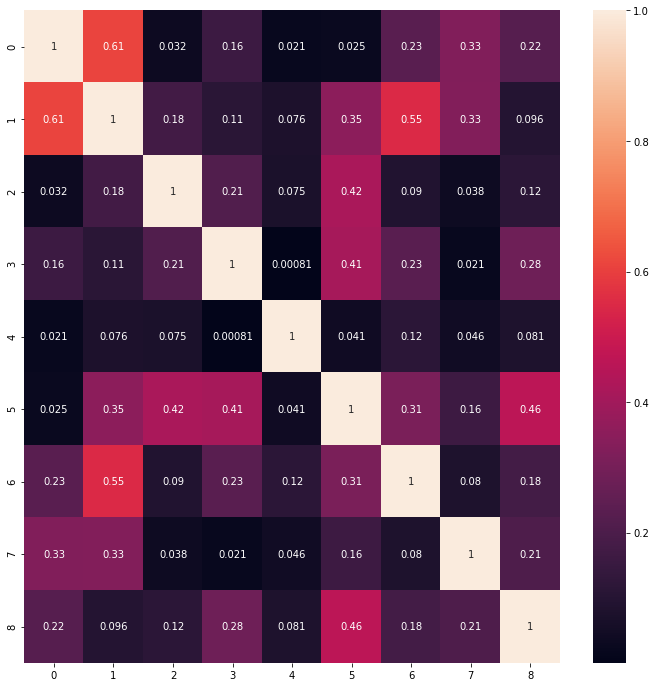

In [10]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler() 
columns_to_retain_red_wine = ['volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 
                              'free sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

scaler.fit(red_wine_df[columns_to_retain_red_wine])
red_wine_X = pd.DataFrame(scaler.transform(red_wine_df[columns_to_retain_red_wine]))
red_wine_Y = pd.DataFrame(red_wine_df['quality'])
display(red_wine_X)
print(red_wine_X.mean())

print('Correlation matrix for red wine:-')
corrMatrix = red_wine_X.corr(method='spearman')
fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(abs(corrMatrix), annot=True)
plt.show()

,0,1,2,3,4,5,6,7,8,9
0,0.172097,-0.081770,0.213280,2.821349,-0.035355,0.744565,0.569932,-1.246921,-0.349184,-1.393152
1,-0.657501,0.215896,0.048001,-0.944765,0.147747,-0.149685,-1.253019,0.740029,0.001342,-0.824276
2,1.475751,0.017452,0.543838,0.100282,0.193523,-0.973336,-0.312141,0.475102,-0.436816,-0.336667
3,0.409125,-0.478657,-0.117278,0.415768,0.559727,1.121091,0.687541,0.011480,-0.787342,-0.499203
4,0.409125,-0.478657,-0.117278,0.415768,0.559727,1.121091,0.687541,0.011480,-0.787342,-0.499203
...,...,...,...,...,...,...,...,...,...,...
4893,-0.776015,-0.677101,-0.365197,-0.944765,-0.310008,-1.091000,-0.664970,0.541334,0.088973,0.557282
4894,-0.301959,0.414339,0.213280,0.317179,0.056196,0.697499,1.275590,-0.253446,-0.261553,-0.743008
4895,-0.420473,-0.379435,-1.191592,-1.023637,-0.218457,-0.643875,-0.312141,-1.313153,-0.261553,-0.905544
4896,-1.605613,0.116674,-0.282557,-1.043355,-1.088192,-0.667408,-0.900190,1.004955,-0.962605,1.857572


0    7.584333e-17
1    5.196832e-16
2    6.019639e-16
3   -1.024542e-16
4    6.482723e-17
5    1.057636e-16
6   -4.671641e-17
7   -1.203860e-15
8   -7.572999e-16
9    1.419308e-15
dtype: float64
Correlation matrix for red wine:-


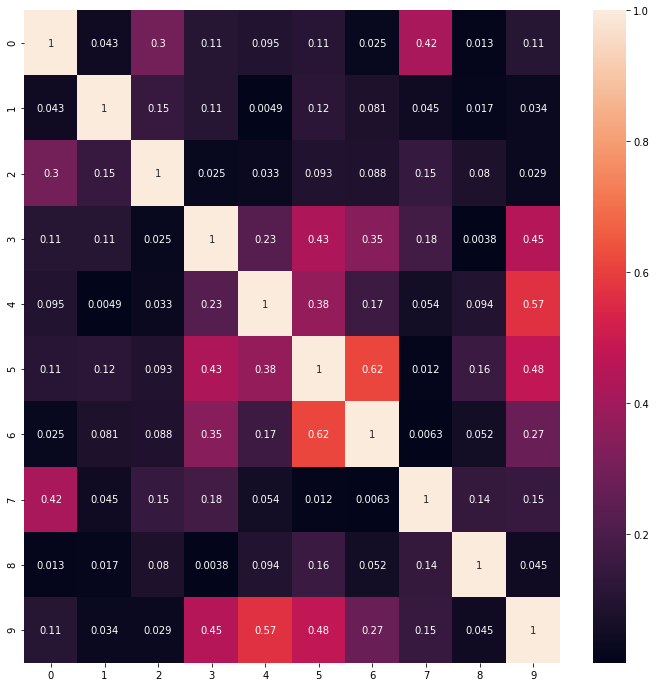

In [11]:
columns_to_retain_white_wine = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 
                                'total sulfur dioxide', 'free sulfur dioxide', 'pH', 'sulphates', 'alcohol']

scaler.fit(white_wine_df[columns_to_retain_white_wine])
white_wine_X = pd.DataFrame(scaler.transform(white_wine_df[columns_to_retain_white_wine]))
white_wine_Y = pd.DataFrame(white_wine_df['quality'])
display(white_wine_X)
print(white_wine_X.mean())

print('Correlation matrix for red wine:-')
corrMatrix = white_wine_X.corr(method='spearman')
fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(abs(corrMatrix), annot=True)
plt.show()

In [12]:
red_wine_train_X, red_wine_test_X, red_wine_train_Y, red_wine_test_Y = train_test_split(red_wine_X, red_wine_Y, 
                                                                                        test_size=0.33, random_state=42)

while_wine_train_X, white_wine_test_X, white_wine_train_Y, white_wine_test_Y = train_test_split(white_wine_X, white_wine_Y, 
                                                                                        test_size=0.33, random_state=42)

In [13]:
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

print('Training Linear Regression Lasso model with GridSearchCV:')
scoring = 'f1'
hyper_params = {'alpha': np.linspace(0.1, 1, 20), 'max_iter': [200, 500, 1000]}
clf = GridSearchCV(estimator=linear_model.Lasso(), param_grid=hyper_params, scoring=scoring)
clf.fit(np.array(red_wine_train_X), np.squeeze(red_wine_train_Y))
print('Best Params:')
print(clf.best_params_)

Training Linear Regression Lasso model with GridSearchCV:


ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [16]:
print(np.squeeze(red_wine_train_Y).shape)

(1071,)
